# 🌊 Seaborn

- Seaborn adds high-level features like automatic styling, themes, color palettes, and dataframe integration.
- Seaborn comes with built in Datasets
- Makes complex plots (like boxplots, violin plots, heatmaps, pairplots) very easy.
- Easy handling of DataFrames (like from pandas)

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 🎨 Seaborn Aesthetics
# -------------------------------

# Style (background + grid)
sns.set_style("whitegrid")   # options: darkgrid, whitegrid, dark, white, ticks

# Context (scales font + elements)
sns.set_context("talk")      # options: paper, notebook, talk, poster

# Color palette (default colors)
sns.set_palette("Set2")      # options: deep, muted, bright, pastel, dark, colorblind, coolwarm, magma, viridis

# Remove extra borders (optional clean look)
sns.despine()

# Show settings applied
print("Seaborn aesthetics applied: whitegrid + talk + Set2 palette")


Seaborn aesthetics applied: whitegrid + talk + Set2 palette


<Figure size 640x480 with 0 Axes>

Hue = adds 3rd variable (color

In [128]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [129]:
sns.set_theme(style="darkgrid") #style="dark"

In [130]:
x=np.array([1,2,3,4,5,6,7,89,0,12,3,4,5,67,8,90,])

In [131]:
y=np.sin(x)

<Axes: >

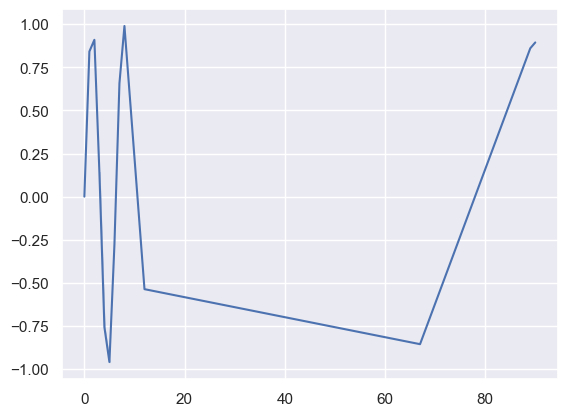

In [132]:
sns.lineplot(x=x,y=y)

# .Basic Plot Types in Seaborn

In [133]:
print(sns.get_dataset_names()) # See All Available Datasets

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [134]:
tips=sns.load_dataset("tips")

In [135]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [136]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<h3 style="color:#0ea5e9; margin:6px 0;">🚀1. Distribution (Shape of the Data)</h3>

- sns.histplot(x, data) → histogram => counts
- sns.kdeplot(x, data) → smooth density => smooth curve

<Axes: xlabel='total_bill', ylabel='Count'>

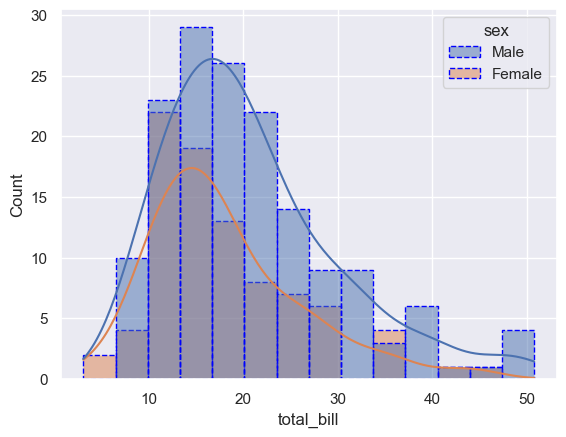

In [137]:
sns.histplot(x="total_bill",data=tips,kde=True,edgecolor="blue",color="hotpink",hue="sex",linestyle="--")

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_26368\111811016.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tips["total_bill"], shade=True)


<Axes: xlabel='total_bill', ylabel='Count'>

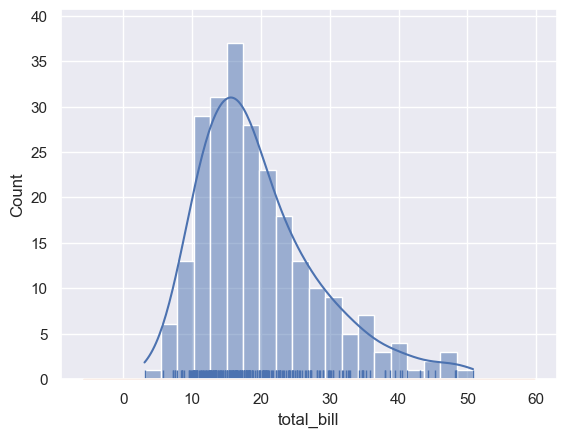

In [138]:
# Histogram
sns.histplot(tips["total_bill"], bins=20, kde=True)

# KDE Plot (density)
sns.kdeplot(tips["total_bill"], shade=True)

# Rug Plot
sns.rugplot(tips["total_bill"])


<h2 style="color:#0ea5e9; margin:6px 0;">🚀2. Relationships (2 variables)</h2>

- sns.scatterplot(x, y, data) → scatter
- sns.lineplot(x, y, data) → trend/time
- sns.regplot(x, y, data) → scatter + best fit line

<h4 style="color:#22c55e; margin:6px 0;">2.1.Scatter-Plot</h4>

- Numeric vs Numeric
- relation

Text(0.5, 1.0, 'Scatter Plot')

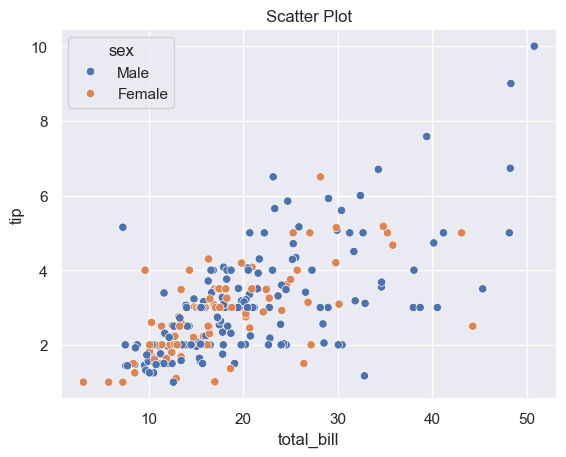

In [139]:
sns.scatterplot(x="total_bill" , y="tip" ,data=tips,hue="sex")
plt.title("Scatter Plot")

<h4 style="color:#22c55e; margin:6px 0;">2.2 Line Plot </h4>

-  numeric vs numeric.
- X-axis: Time/Ordered (Numeric/Datetime)
- Y-axis: Numeric
- trend

Text(0.5, 1.0, 'Line plot')

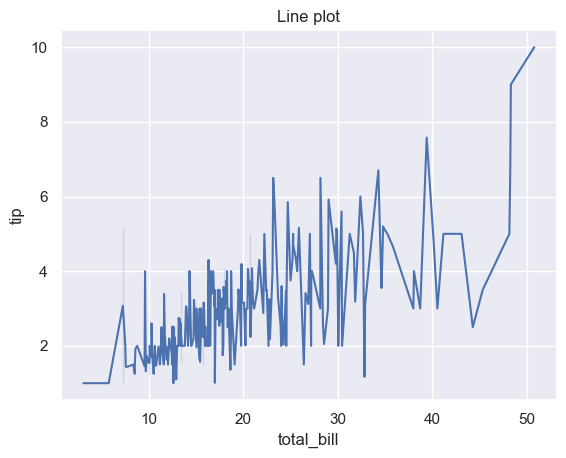

In [140]:
sns.lineplot(x="total_bill",y="tip",data=tips)
plt.title("Line plot")



<Axes: xlabel='day', ylabel='tip'>

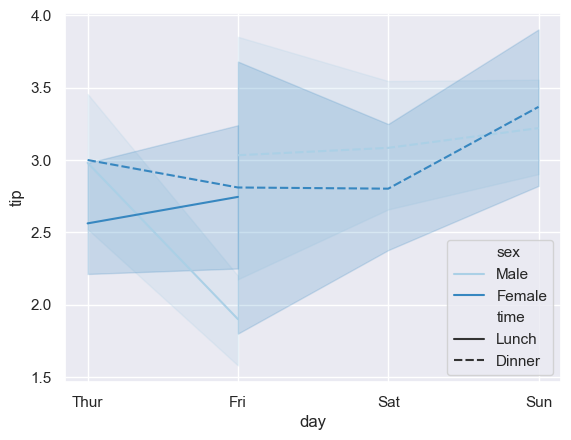

In [141]:
sns.lineplot(x="day" , y="tip" ,data=tips ,hue="sex",style="time",palette='Blues')

<h4 style="color:#22c55e; margin:6px 0;">2.3 Regression</h4> 

- regplot = numeric vs numeric (with regression line).
- trend+fir line

<Axes: xlabel='tip', ylabel='total_bill'>

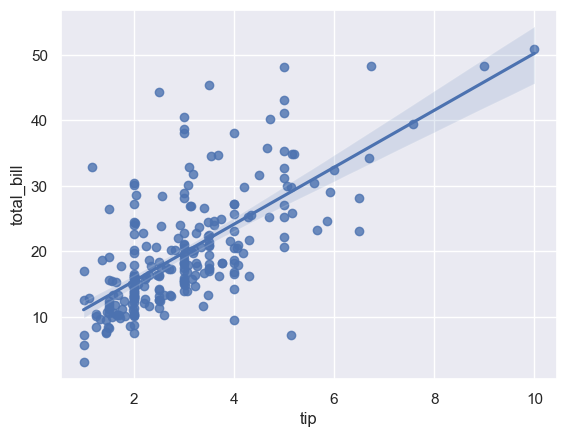

In [142]:
sns.regplot(x="tip", y="total_bill",data=tips, fit_reg=True, scatter=True, color=None, marker='o')


<h2 style="color:#0ea5e9; margin:6px 0;">🚀3. Categories (Comparisons)</h2>

<h4 style="color:#22c55e; margin:6px 0;">3.1 Bar-Plot</h4>

- X-axis:categorical vs Y-axis:numeric (summarize means).

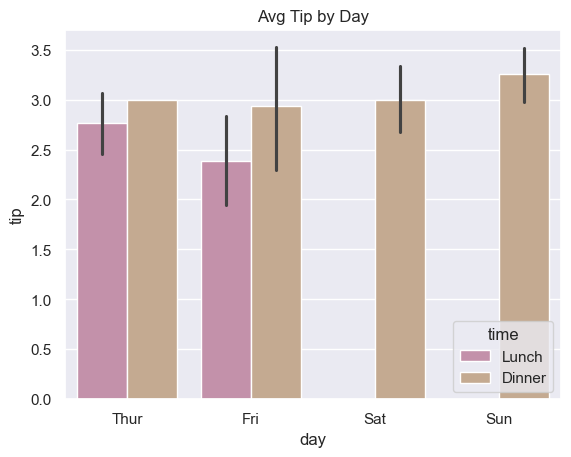

In [143]:
sns.barplot(x="day", y="tip",data=tips,hue="time",palette="spring",saturation=0.3)
plt.title('Avg Tip by Day')
plt.show()
          

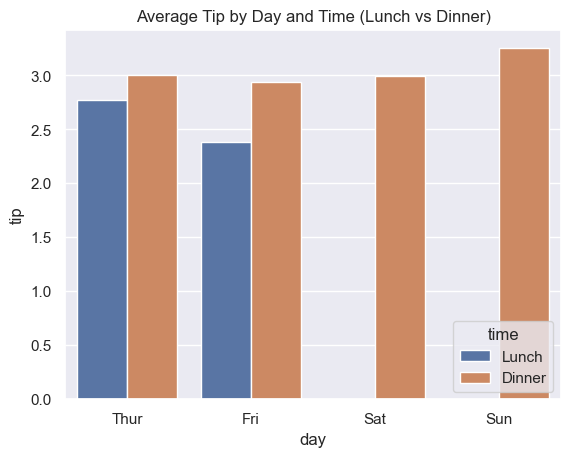

In [144]:
sns.barplot(x="day", y="tip", hue="time", data=tips,errorbar=('ci', False)#removes middle black line
           ) #hue="time" → Split each bar into Lunch vs Dinne
plt.title("Average Tip by Day and Time (Lunch vs Dinner)")
plt.show()


<h4 style="color:#22c55e; margin:6px 0;">3.2.count-Plot</h4>

- categorical vs categorical

<Axes: xlabel='sex', ylabel='count'>

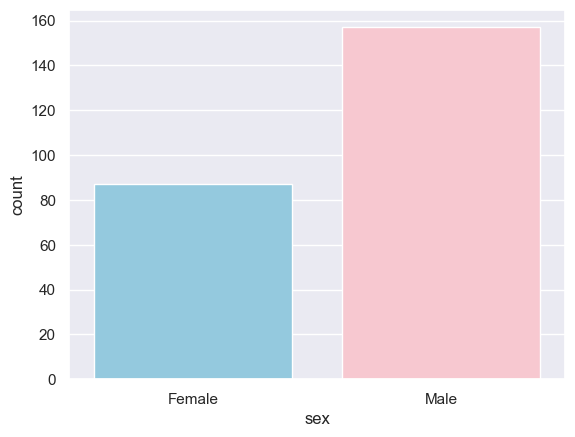

In [145]:
sns.countplot(x="sex",data=tips,order=["Female","Male"],hue="sex",palette=["pink","skyblue"])

In [146]:
#hue=categorical variable liek "sex","smoker","class","day","time"

<h4 style="color:#22c55e; margin:6px 0;">3.3 Box-Plot</h4>

- X-> numerical
- y-> categorical

<Axes: xlabel='day', ylabel='total_bill'>

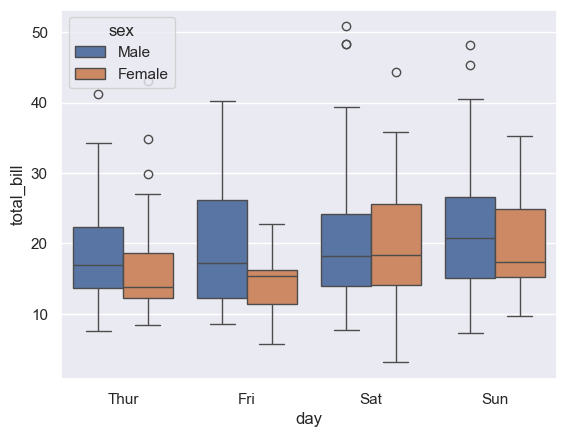

In [147]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)


<h4 style="color:#22c55e; margin:6px 0;">🎻3.4 Violin-Plot</h4>

- x / y → categorical vs numeric (like boxplot).

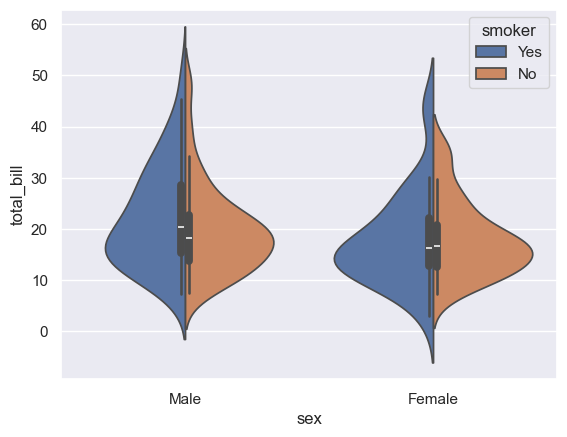

In [148]:
sns.violinplot(x="sex", y="total_bill", hue="smoker", split=True, inner="box", data=tips)
plt.show()

In [149]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<h2 style="color:#0ea5e9; margin:6px 0;">🚀 4. Multi-variable / EDA helpers</h2>

<h4 style="color:#22c55e; margin:6px 0;">4.1 Heatmap</h4>

In [150]:
flights=sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


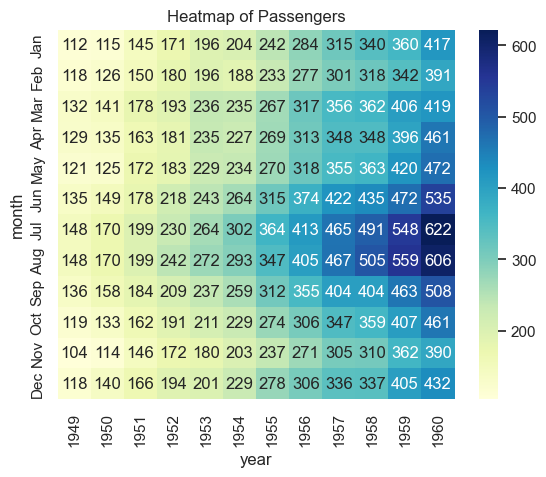

In [151]:
flights = sns.load_dataset('flights')
pivot_table = flights.pivot(index="month", columns="year",values= "passengers")

sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Passengers')
plt.show()

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_26368\2683595503.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pv = tips.pivot_table(values="tip", index="day", columns="time", aggfunc="mean")


Text(47.25, 0.5, 'Day')

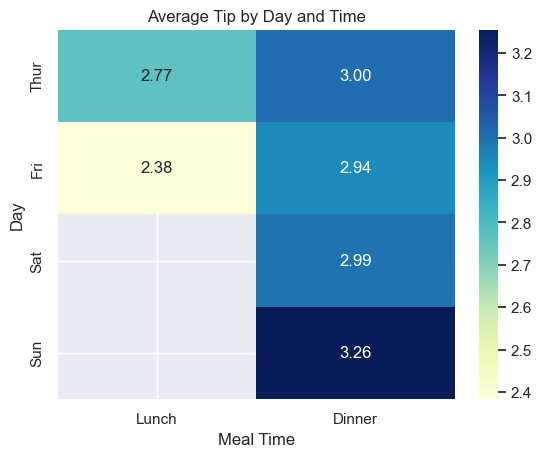

In [152]:
pv = tips.pivot_table(values="tip", index="day", columns="time", aggfunc="mean")
sns.heatmap(pv, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Tip by Day and Time")
plt.xlabel("Meal Time")
plt.ylabel("Day")

<h4 style="color:#22c55e; margin:6px 0;">4.2 Pairplot</h4>
pairwise relationships between numerical columns in a dataset.

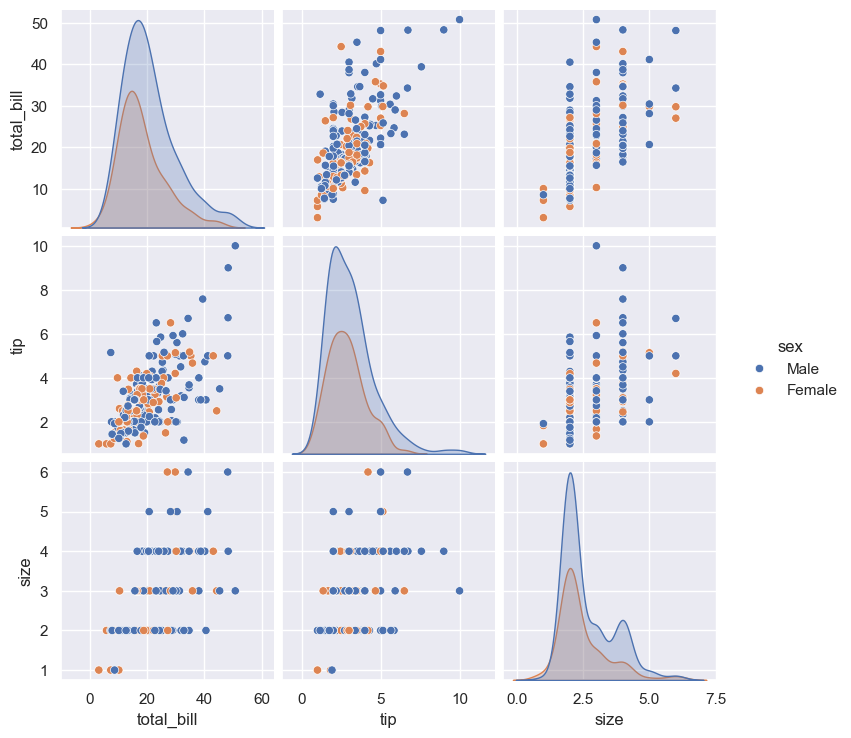

In [153]:
sns.pairplot(tips,hue="sex",diag_kind="kde")
plt.show()

## Working with Pandas DataFrames

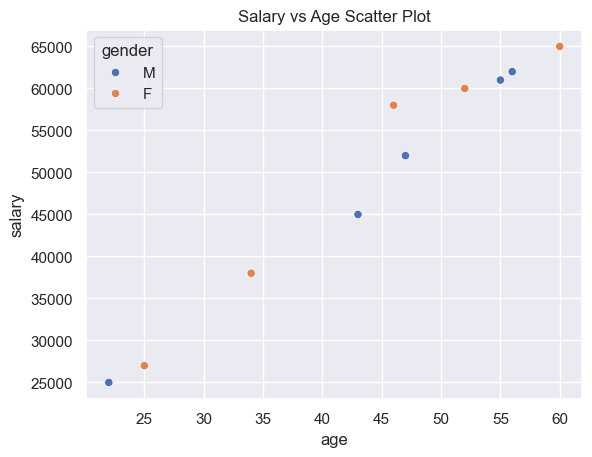

In [154]:
import pandas as pd

df = pd.DataFrame({
    "age": [22, 25, 47, 52, 46, 56, 55, 60, 34, 43],
    "salary": [25000, 27000, 52000, 60000, 58000, 62000, 61000, 65000, 38000, 45000],
    "gender": ["M", "F", "M", "F", "F", "M", "M", "F", "F", "M"]
})

sns.scatterplot(x="age", y="salary", hue="gender", data=df)
plt.title('Salary vs Age Scatter Plot')
plt.show()